# การสร้างกราฟแท่งด้วย pandas เบื้องต้น

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')

pandas version: 0.23.0


In [3]:
pd.set_option('display.max_rows', 10)

### PISA score from Wikipedia
https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment

In [4]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015.csv')
df

,Country,Maths,Science,Reading
0,Singapore,564,556,535
1,Hong Kong,548,523,527
2,Macau,544,529,509
3,Taiwan,542,532,497
4,Japan,532,538,516
...,...,...,...,...
65,Macedonia,371,384,352
66,Tunisia,367,386,361
67,Kosovo,362,378,347
68,Algeria,360,376,350


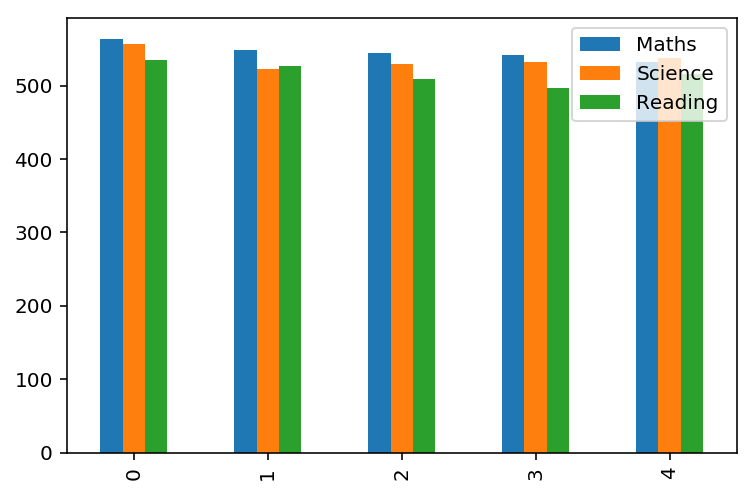

In [5]:
df[:5].plot(kind='bar');

In [6]:
df.set_index('Country', inplace=True)

In [7]:
df

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516
...,...,...,...
Macedonia,371,384,352
Tunisia,367,386,361
Kosovo,362,378,347


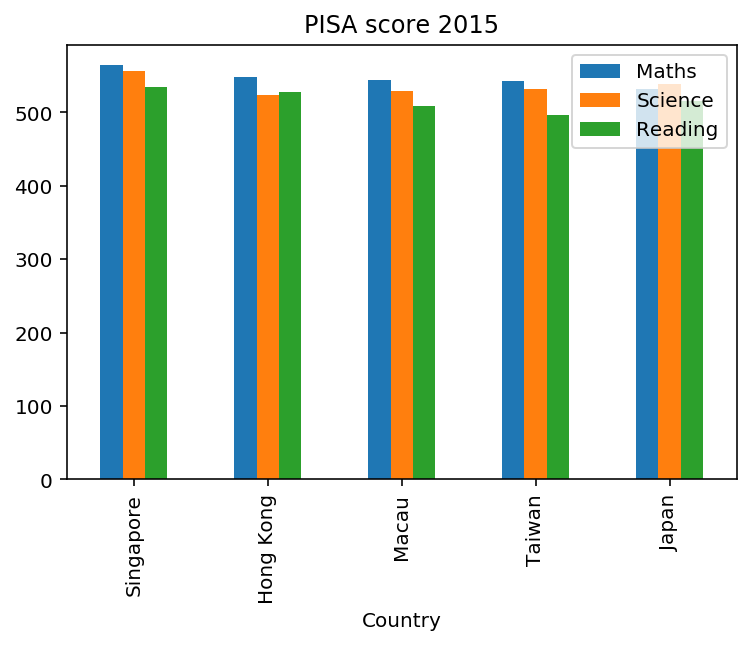

In [8]:
df[:5].plot(kind='bar', title='PISA score 2015');

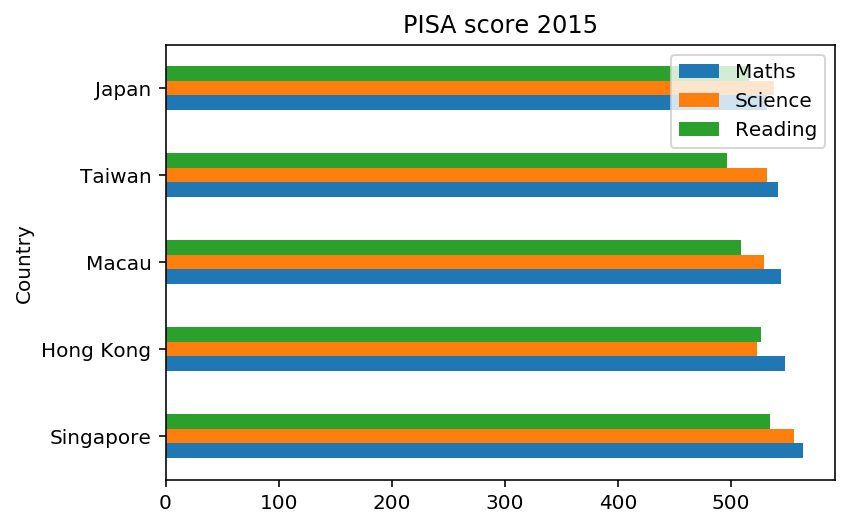

In [9]:
df[:5].plot(kind='barh', title='PISA score 2015');

In [10]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/pisa2015.csv',
               index_col='Country')
df

,Maths,Science,Reading
Country,,,
Singapore,564,556,535
Hong Kong,548,523,527
Macau,544,529,509
Taiwan,542,532,497
Japan,532,538,516
...,...,...,...
Macedonia,371,384,352
Tunisia,367,386,361
Kosovo,362,378,347


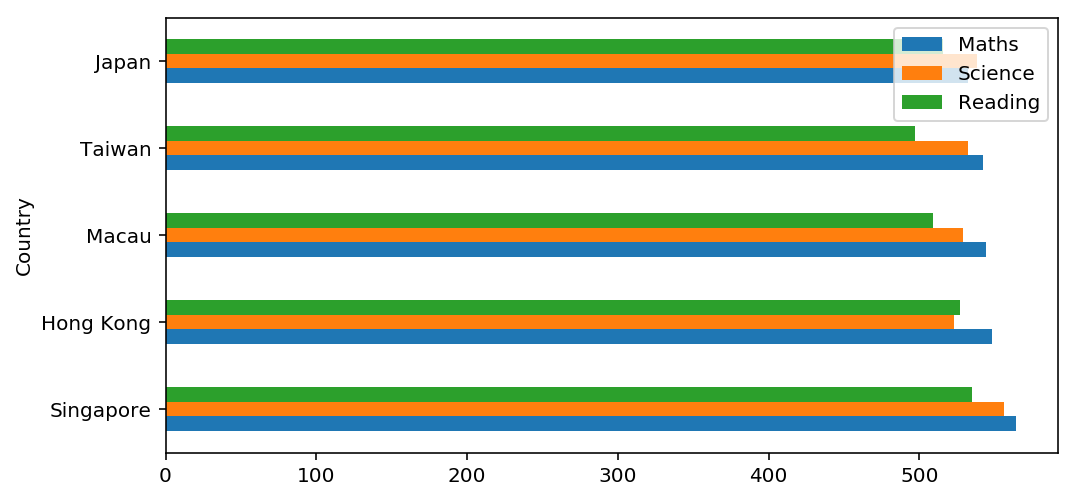

In [11]:
df[:5].plot(kind='barh', figsize=(8, 4));

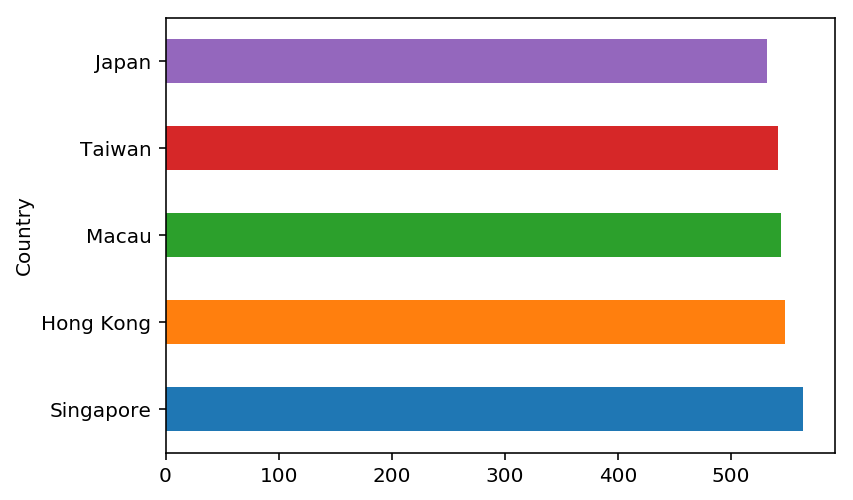

In [12]:
df[:5]['Maths'].plot(kind='barh');

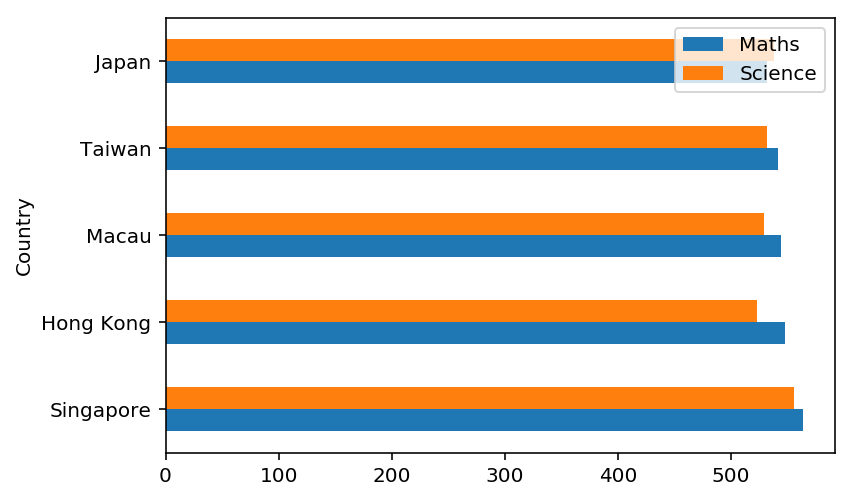

In [13]:
df[:5][['Maths', 'Science']].plot(kind='barh');

https://matplotlib.org/2.0.0/examples/color/named_colors.html

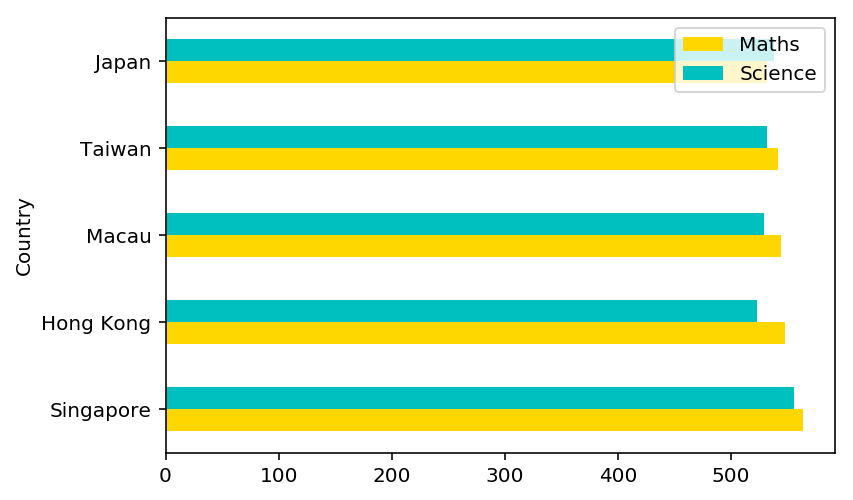

In [14]:
df[:5][['Maths', 'Science']].plot(kind='barh', color=['gold', 'c']);

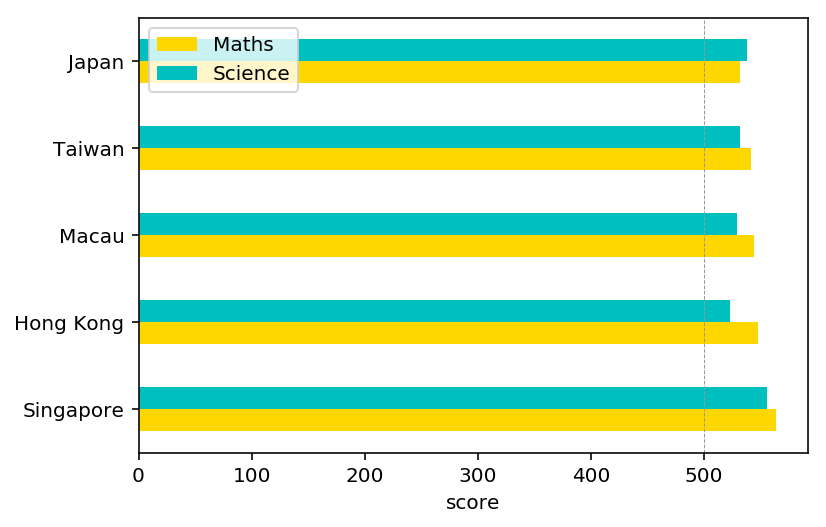

In [15]:
ax=df[:5][['Maths', 'Science']].plot(kind='barh', color=['gold', 'c']);
ax.axvline(500, color=".6", linestyle="--", linewidth=.5)
ax.set_xlabel('score')
ax.set_ylabel('');

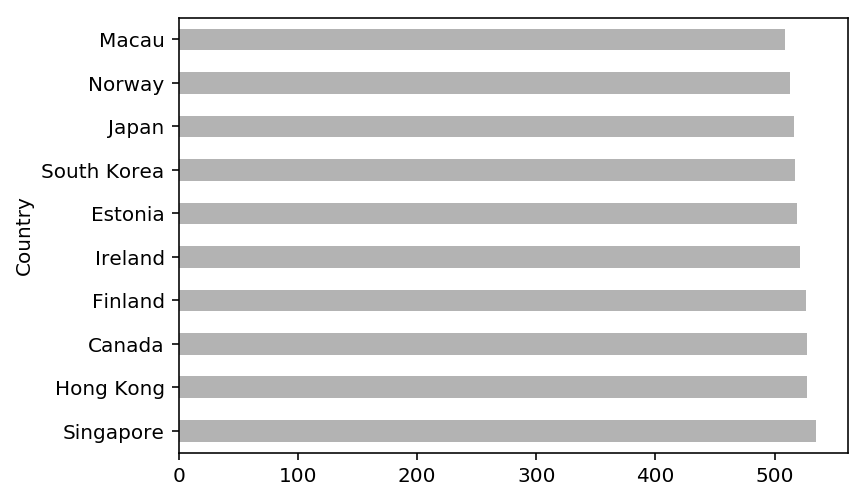

In [16]:
df.nlargest(10, 'Reading')['Reading'].plot(kind='barh', color='.7')

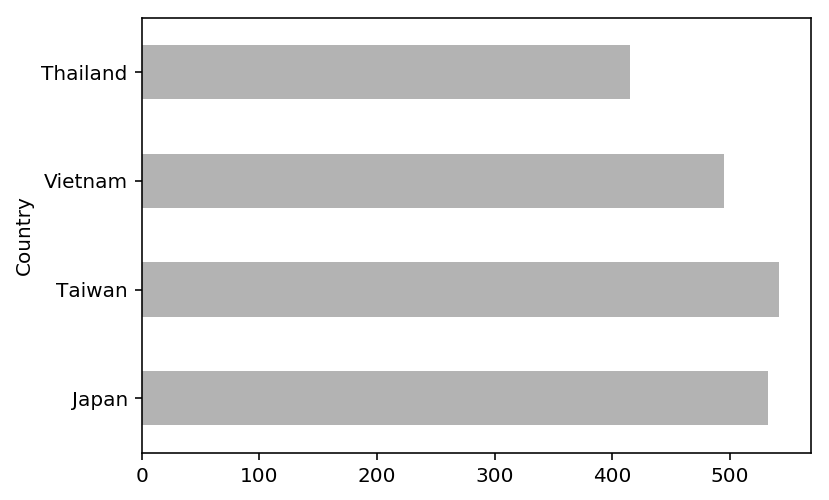

In [17]:
df.loc[['Japan', 'Taiwan', 'Vietnam', 'Thailand'], 'Maths'].plot(kind='barh', color='.7')

In [18]:
df.Maths.mean()

461.6714285714286

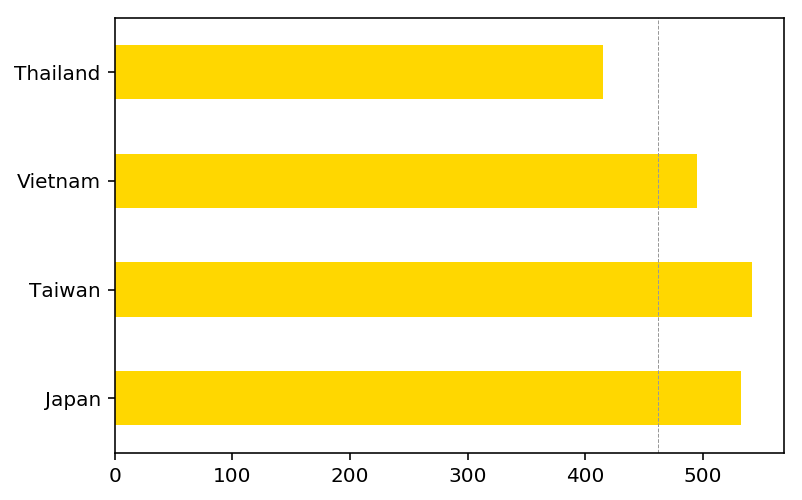

In [19]:
ax=df.loc[['Japan', 'Taiwan', 'Vietnam', 'Thailand'], 'Maths'].plot(kind='barh', color='gold')
ax.axvline(df.Maths.mean(), color=".6", linestyle="--", linewidth=.5)
ax.set_ylabel('');

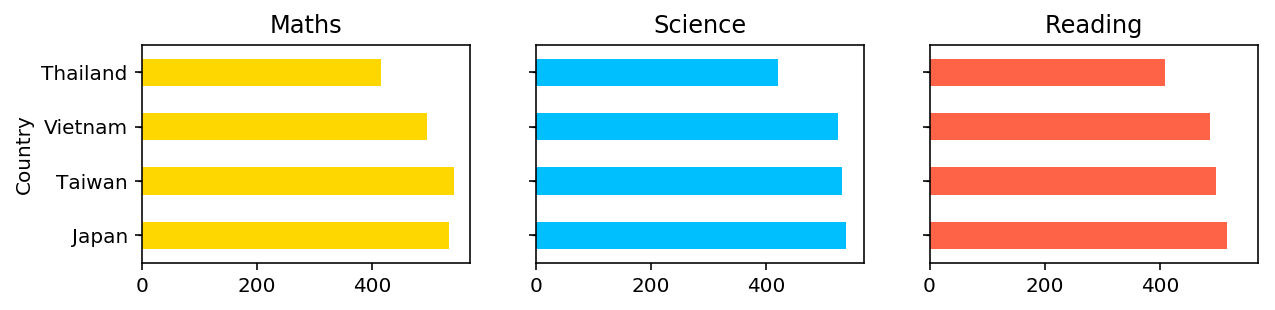

In [20]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
df.loc[country_list, 'Maths'].plot(kind='barh', color='gold', ax=ax[0], title='Maths');
df.loc[country_list, 'Science'].plot(kind='barh', color='deepskyblue', ax=ax[1], title='Science');
df.loc[country_list, 'Reading'].plot(kind='barh', color='tomato', ax=ax[2], title='Reading');

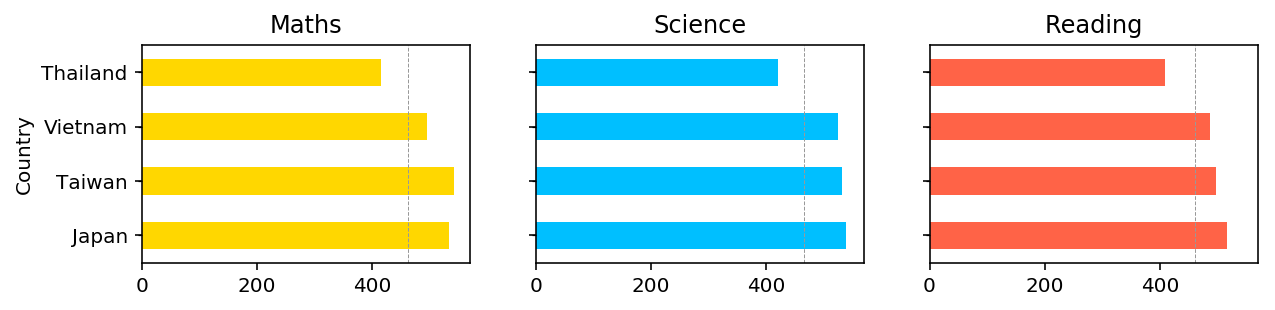

In [21]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
ax0=df.loc[country_list, 'Maths'].plot(kind='barh', color='gold', ax=ax[0], title='Maths');
ax0.axvline(df.Maths.mean(), color=".6", linestyle="--", linewidth=.5)

ax1=df.loc[country_list, 'Science'].plot(kind='barh', color='deepskyblue', ax=ax[1], title='Science');
ax1.axvline(df.Science.mean(), color=".6", linestyle="--", linewidth=.5)

ax2=df.loc[country_list, 'Reading'].plot(kind='barh', color='tomato', ax=ax[2], title='Reading');
ax2.axvline(df.Reading.mean(), color=".6", linestyle="--", linewidth=.5)

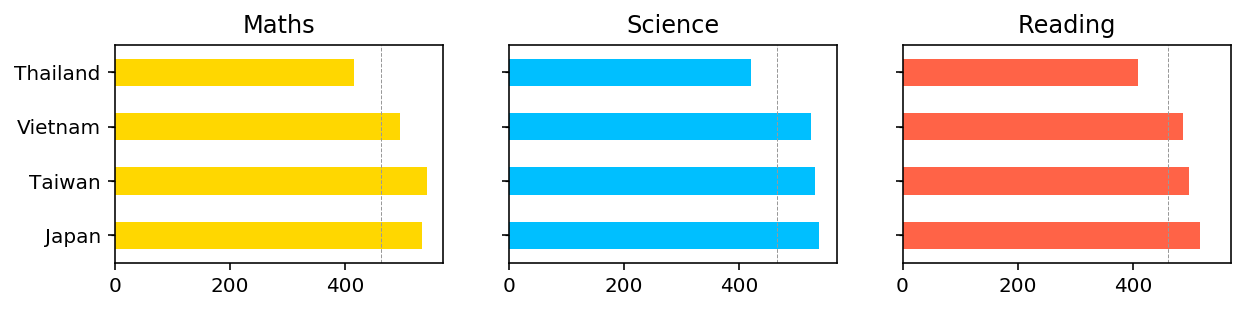

In [22]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10, 2))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
color = ['gold', 'deepskyblue', 'tomato']
subject = ['Maths', 'Science', 'Reading']
for i in range(len(subject)):
    ax0=df.loc[country_list, subject[i]].plot(kind='barh', color=color[i], ax=ax[i], title=subject[i])
    ax0.axvline(df[subject[i]].mean(), color=".6", linestyle="--", linewidth=.5)
    ax0.set_ylabel('');

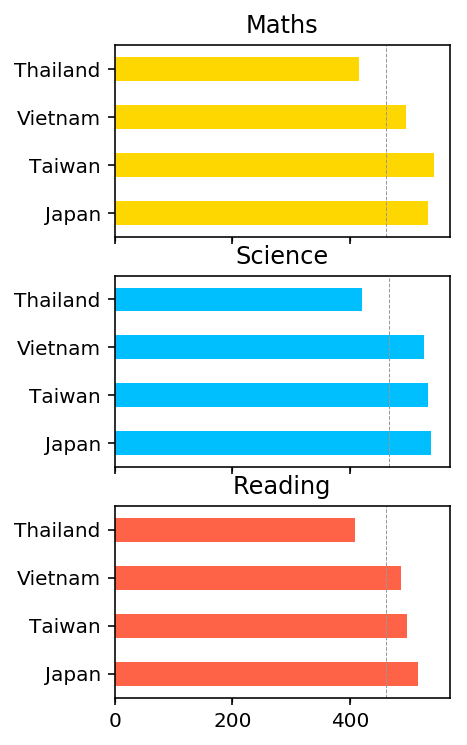

In [23]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(3, 6))
country_list = ['Japan', 'Taiwan', 'Vietnam', 'Thailand']
color = ['gold', 'deepskyblue', 'tomato']
subject = ['Maths', 'Science', 'Reading']
for i in range(len(subject)):
    ax0=df.loc[country_list, subject[i]].plot(kind='barh', color=color[i], ax=ax[i], title=subject[i])
    ax0.axvline(df[subject[i]].mean(), color=".6", linestyle="--", linewidth=.5)
    ax0.set_ylabel('');

## การกำหนดรูปแบบการแสดงตัวเลขในแกน เช่น มีการคั่นด้วย , ในเลขหลักพัน

In [24]:
df['Total'] = df.Maths + df.Science + df.Reading

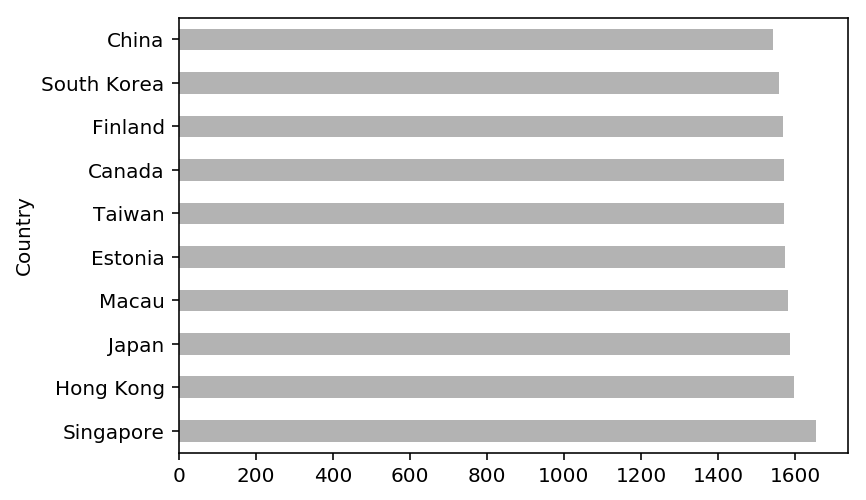

In [25]:
df.nlargest(10, 'Total')['Total'].plot(kind='barh', color='.7');

In [26]:
def fmt_pct(v, pos):
    return "{:.1f}%".format(100 * v)

In [27]:
def fmt_thousand(v, pos):
    return "{:,.0f}".format(v)

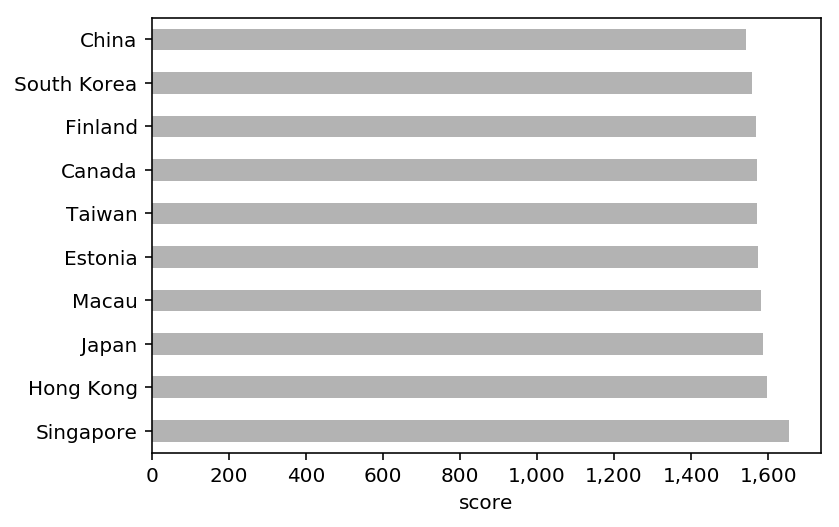

In [28]:
ax=df.nlargest(10, 'Total')['Total'].plot(kind='barh', color='.7')
ax.set_xlabel('score')
ax.set_ylabel('')
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}".format(v)))